In [ ]:
pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 61.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import mysql.connector
# Step 1: Load the CSV file (simulate distributor sending catalog)
file_path = '/content/sample_data/product_catalogue.csv'
data = pd.read_csv(file_path)

print("Data loaded:")
print(data.head())

# Step 2: Basic Cleaning
# Fill missing prices with 0
# Fill missing stock with 0
data['Price'] = data['Price'].fillna(0)
data['Stock'] = data['Stock'].fillna(0)

# Remove duplicates based on Product ID
data = data.drop_duplicates(subset=['ProductID'])

print(data)


Data loaded:
  ProductID     ProductName          Category     Color          Size  \
0    AR-001         RXV450T    Audio Receiver     Black   15.5" x 12"   
1    CP-001         DEJ 785         CD Player    Silver  10.2" x 8.7"   
2    NE-001        DNE 300S  Network Extender     White   6.3" x 4.1"   
3    AS-001  Philips AZ1830      Audio System  Titanium    18" x 5.9"   
4    RT-001  NETGEAR WPN824            Router     Black   9.8" x 7.1"   

     Price  Stock  
0  $299.00     25  
1  $129.00     18  
2   $89.00     42  
3  $199.00     30  
4   $79.00     55  
   ProductID                        ProductName             Category  \
0     AR-001                            RXV450T       Audio Receiver   
1     CP-001                            DEJ 785            CD Player   
2     NE-001                           DNE 300S     Network Extender   
3     AS-001                     Philips AZ1830         Audio System   
4     RT-001                     NETGEAR WPN824               Router

In [ ]:
!apt-get install mysql-server
!service mysql start


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libclone-perl libencode-locale-perl
  libfcgi-bin libfcgi-perl libfcgi0ldbl libhtml-parser-perl
  libhtml-tagset-perl libhtml-template-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl liblwp-mediatypes-perl libmecab2
  libprotobuf-lite23 liburi-perl mecab-ipadic mecab-ipadic-utf8 mecab-utils
  mysql-client-8.0 mysql-client-core-8.0 mysql-server-8.0
  mysql-server-core-8.0
Suggested packages:
  libdata-dump-perl libipc-sharedcache-perl libbusiness-isbn-perl libwww-perl
  mailx tinyca
The following NEW packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libclone-perl libencode-locale-perl
  libfcgi-bin libfcgi-perl libfcgi0ldbl libhtml-parser-perl
  libhtml-tagset-perl libhtml-template-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl liblwp-mediatypes-perl libmecab2
  lib

In [ ]:
!sudo mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY 'mysql'; FLUSH PRIVILEGES;"


In [ ]:
!pip install mysql-connector-python


# Step 3: Connect to  MySQL

mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="mysql",

cursor = mydb.cursor()
print(mydb)

In [ ]:
# Connect to MySQL
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="mysql",

)
cursor = mydb.cursor()
print(mysql)

<module 'mysql' from '/usr/local/lib/python3.11/dist-packages/mysql/__init__.py'>


In [ ]:
cursor.execute("CREATE DATABASE IF NOT EXISTS product_data")

In [ ]:
cursor.execute("USE product_data")

In [ ]:
cursor.execute('''CREATE TABLE IF NOT EXISTS Products (
    ProductID VARCHAR(25)  PRIMARY KEY,
    ProductName TEXT,
    Category TEXT,
    Color TEXT,
    Size TEXT,
    Price REAL,
    Stock INTEGER
)''')
# Commit the changes
mydb.commit()
print("Table 'products' created successfully!")


Table 'products' created successfully!


In [ ]:
# Insert data into MySQL
for index, row in data.iterrows():
    sql = "INSERT INTO Products (ProductID, ProductName, Category, Color, Size, Price, Stock) VALUES (%s, %s, %s, %s, %s, %s, %s)"
    values = (
        row['ProductID'],
        row['ProductName'],
        row['Category'],
        row['Color'],
        row['Size'],
        float(str(row['Price']).replace('$', '').replace(',', '')),
        int(row['Stock'])
    )
    cursor.execute(sql, values)

mydb.commit()
print("✅ Data inserted successfully!")

✅ Data inserted successfully!


In [21]:
import matplotlib.pyplot as plt

# Clean column names
data.columns = data.columns.str.strip()

# Convert Price to float (remove $ and commas)
data['Price'] = data['Price'].replace('[\$,]', '', regex=True).astype(float)

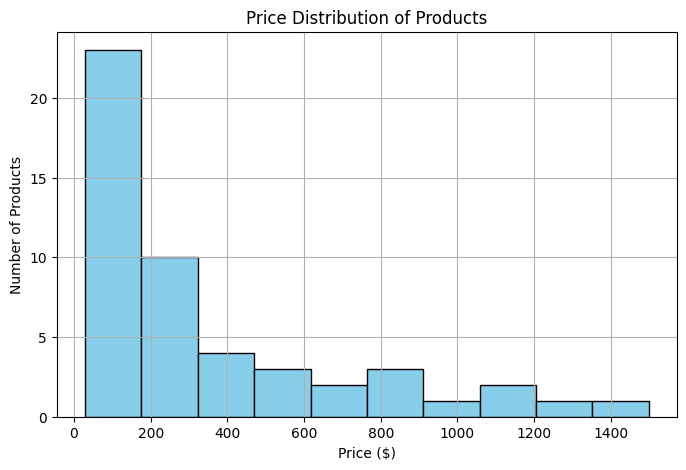

In [22]:
plt.figure(figsize=(8, 5))
plt.hist(data['Price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Price Distribution of Products')
plt.xlabel('Price ($)')
plt.ylabel('Number of Products')
plt.grid(True)
plt.show()


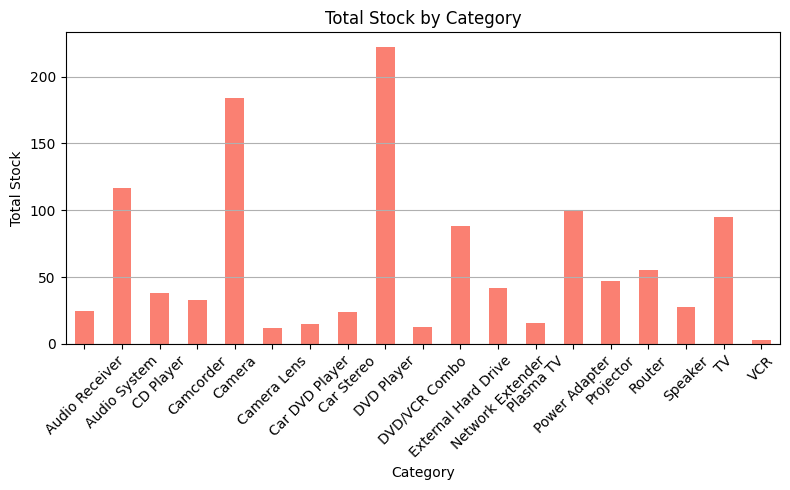

In [23]:
category_stock = data.groupby('Category')['Stock'].sum()

plt.figure(figsize=(8, 5))
category_stock.plot(kind='bar', color='salmon')
plt.title('Total Stock by Category')
plt.xlabel('Category')
plt.ylabel('Total Stock')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


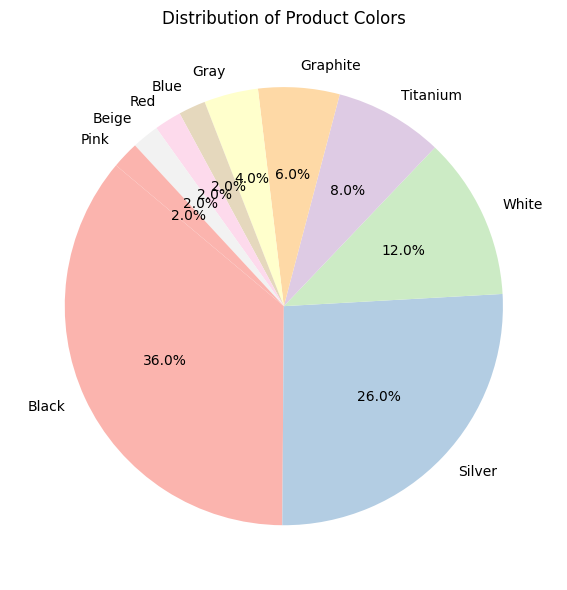

In [24]:
color_counts = data['Color'].value_counts()

plt.figure(figsize=(6, 6))
color_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Product Colors')
plt.ylabel('')
plt.tight_layout()
plt.show()
